In [1]:
from python_speech_features import mfcc
from scipy.fft import fft
from scipy import signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def GetSpectrum(x, fs, winlen, winstep):
    """ x is the speech vector,
        fs is the sample frequency
        alen is the analysis frame length,
        ulen is the update length"""
    alen = int(np.ceil(fs * winlen))
    ulen = int(np.ceil(fs * winstep))
    N = len(x)
    naf = np.floor((N - alen + ulen) / ulen)
    naf = int(naf)
    n1 = 1
    n2 = alen
    alen_2 = int(alen / 2)

    spec = np.zeros((alen_2, naf))

    for n in range(0, naf):
        xf = x[n1 - 1: n2]
        xf2 = xf * np.hanning(alen)

        if alen > ulen:
            X = fft(xf2)
        else:
            X = fft(xf2, 2 * alen)

        spec[:, n] = 10 * (np.abs(X[0: alen // 2]) ** 2)

        n1 = n1 + ulen
        n2 = n2 + ulen

    return spec


def GetSpeechFeatures(signal, fs, winlen, winstep, nfilt, nfft, winfunc):
    features_mfcc = mfcc(signal, fs,
                         winlen=winlen, winstep=winstep,
                         nfilt=nfilt,
                         nfft=nfft,
                         winfunc=winfunc)
    return features_mfcc


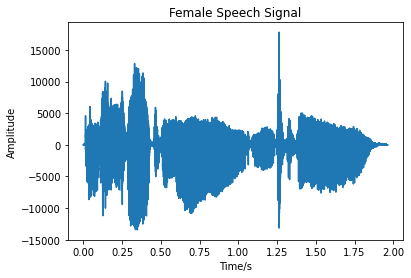

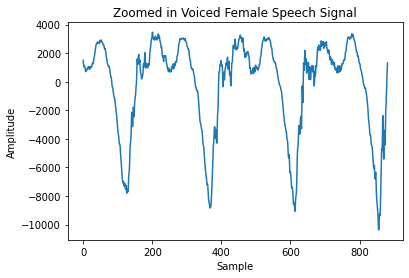

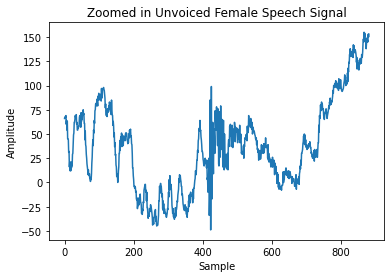

In [4]:
'''# ****************** Sound signals of female\male\music speech ****************** #'''
# female
female_fs, female_sig = wav.read('female.wav')
t_female = np.arange(len(female_sig)) / female_fs
plt.plot(t_female, female_sig)
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.title('Female Speech Signal')
plt.show()

plt.plot(female_sig[28000:28882])
plt.title('Zoomed in Voiced Female Speech Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

plt.plot(female_sig[85000:85882])
plt.title('Zoomed in Unvoiced Female Speech Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

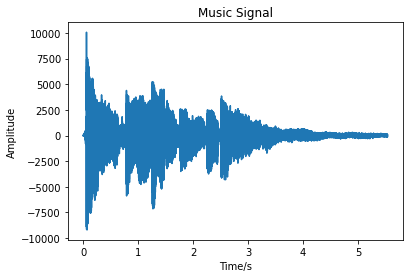

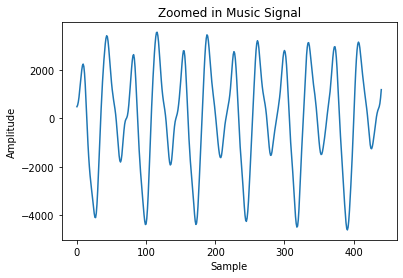

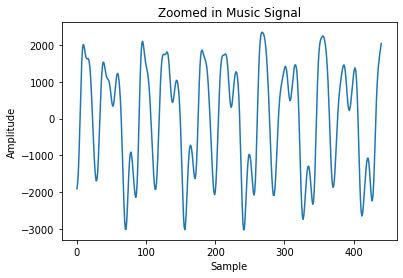

In [5]:
# male
male_fs, male_sig = wav.read('male.wav')

# music
music_fs, music_sig = wav.read('music.wav')
t_music = np.arange(len(music_sig)) / music_fs
plt.plot(t_music, music_sig)
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.title('Music Signal')
plt.show()

plt.plot(music_sig[24000:24441])
plt.title('Zoomed in Music Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

plt.plot(music_sig[58000:58441])
plt.title('Zoomed in Music Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

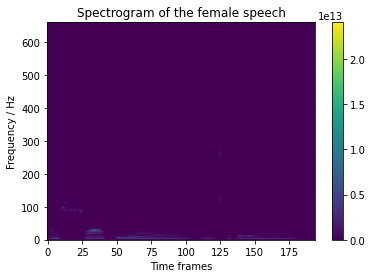

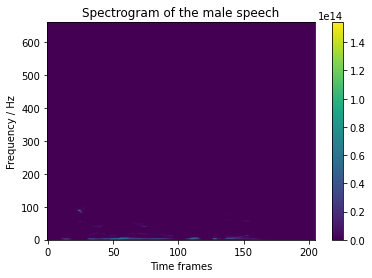

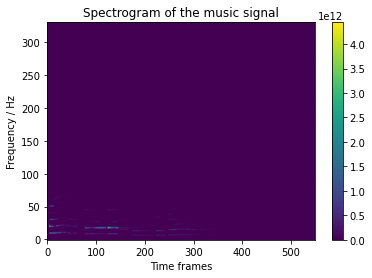

In [6]:
'''# ****************** Spectrogram of female\male\music speech ****************** #'''
# female
female_spec = GetSpectrum(female_sig, female_fs, 0.03, 0.01)
plt.imshow(female_spec, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Frequency / Hz')
plt.colorbar()
plt.title('Spectrogram of the female speech')
plt.show()

# male
male_spec = GetSpectrum(male_sig, male_fs, 0.03, 0.01)
plt.imshow(male_spec, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Frequency / Hz')
plt.colorbar()
plt.title('Spectrogram of the male speech')
plt.show()

# music
music_spec = GetSpectrum(music_sig, music_fs, 0.03, 0.01)
plt.imshow(music_spec, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Frequency / Hz')
plt.colorbar()
plt.title('Spectrogram of the music signal')
plt.show()

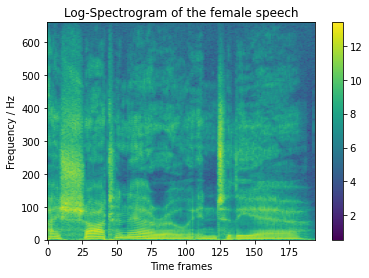

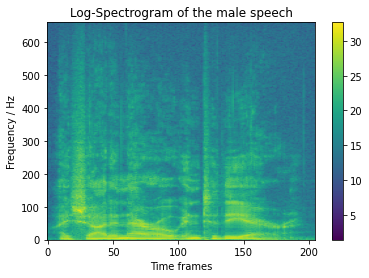

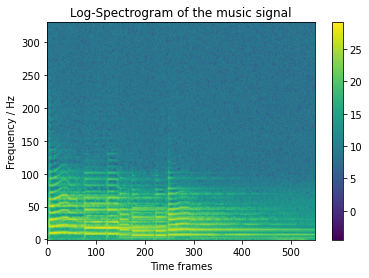

In [7]:
'''# ****************** Log-Spectrogram of female\male\music speech ****************** #'''
# female
female_logsp = np.log10(female_spec)
plt.imshow(female_logsp, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Frequency / Hz')
plt.colorbar()
plt.title('Log-Spectrogram of the female speech')
plt.show()

# male
male_logsp = np.log(male_spec)
plt.imshow(male_logsp, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Frequency / Hz')
plt.colorbar()
plt.title('Log-Spectrogram of the male speech')
plt.show()

# music
music_logsp = np.log(music_spec)
plt.imshow(music_logsp, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Frequency / Hz')
plt.colorbar()
plt.title('Log-Spectrogram of the music signal')
plt.show()

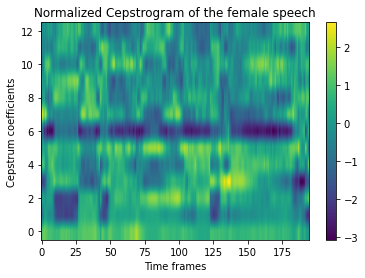

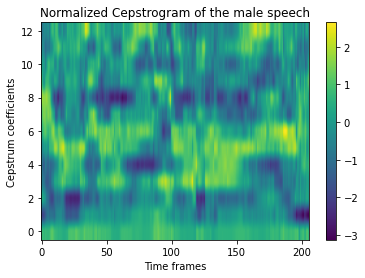

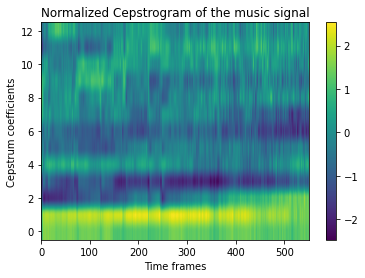

In [8]:

'''# ****************** Cepstrogram of female/male/music speech ****************** #'''
# female
female_mfcc = GetSpeechFeatures(female_sig, female_fs, 0.03, 0.01, 30, 1323, np.hanning)
female_mfcc = female_mfcc.T
female_mfcc_nor = np.zeros((female_mfcc.shape[0], female_mfcc.shape[1]))
for i in range(female_mfcc.shape[1]):
    female_mfcc_nor[:, i] = female_mfcc[:, i] - np.mean(female_mfcc[:, i])
    female_mfcc_nor[:, i] = female_mfcc_nor[:, i] / np.std(female_mfcc_nor[:, i])

plt.imshow(female_mfcc_nor, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Cepstrum coefficients')
plt.colorbar()
plt.title('Normalized Cepstrogram of the female speech')
plt.show()

# male
male_mfcc = GetSpeechFeatures(male_sig, male_fs, 0.03, 0.01, 30, 1323, np.hanning)
male_mfcc = male_mfcc.T
male_mfcc_nor = np.zeros((male_mfcc.shape[0], male_mfcc.shape[1]))
for i in range(male_mfcc.shape[1]):
    male_mfcc_nor[:, i] = male_mfcc[:, i] - np.mean(male_mfcc[:, i])
    male_mfcc_nor[:, i] = male_mfcc_nor[:, i] / np.std(male_mfcc_nor[:, i])

plt.imshow(male_mfcc_nor, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Cepstrum coefficients')
plt.colorbar()
plt.title('Normalized Cepstrogram of the male speech')
plt.show()

# music
music_mfcc = GetSpeechFeatures(music_sig, music_fs, 0.03, 0.01, 30, 662, np.hanning)
music_mfcc = music_mfcc.T
music_mfcc_nor = np.zeros((music_mfcc.shape[0], music_mfcc.shape[1]))
for i in range(music_mfcc.shape[1]):
    music_mfcc_nor[:, i] = music_mfcc[:, i] - np.mean(music_mfcc[:, i])
    music_mfcc_nor[:, i] = music_mfcc_nor[:, i] / np.std(music_mfcc_nor[:, i])

plt.imshow(music_mfcc_nor, aspect="auto", cmap="viridis", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Cepstrum coefficients')
plt.colorbar()
plt.title('Normalized Cepstrogram of the music signal')
plt.show()

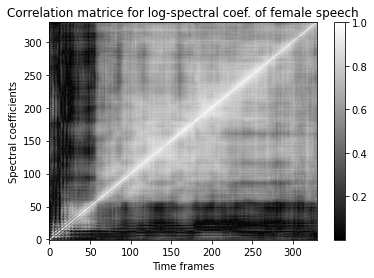

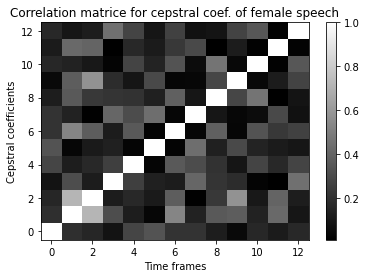

In [9]:
'''# ****** Correlation matrices for spectral/cepstral coefficients of female ******* #'''
# Spectral coefficients
spec_corr = np.abs(np.corrcoef(female_logsp, female_logsp))
spec_corr = spec_corr[0:330, 0:330]
plt.imshow(spec_corr, aspect="auto", cmap="gray", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Spectral coefficients')
plt.colorbar()
plt.title('Correlation matrice for log-spectral coef. of female speech')
plt.show()

# Cepstral codfficients
cep_corr = np.abs(np.corrcoef(female_mfcc_nor, female_mfcc_nor))
cep_corr = cep_corr[0:13, 0:13]
plt.imshow(cep_corr, aspect="auto", cmap="gray", origin="lower")
plt.xlabel('Time frames')
plt.ylabel('Cepstral coefficients')
plt.colorbar()
plt.title('Correlation matrice for cepstral coef. of female speech')
plt.show()